In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!ls '/content/drive'

MyDrive


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Projects/SkinDiseaseDetectionSystem/Dataset/train'
test_path = '/content/drive/MyDrive/Projects/SkinDiseaseDetectionSystem/Dataset/test'

Working with 1915 images
Image examples: 
eczema_0184.png_rotated_90_1.jpg


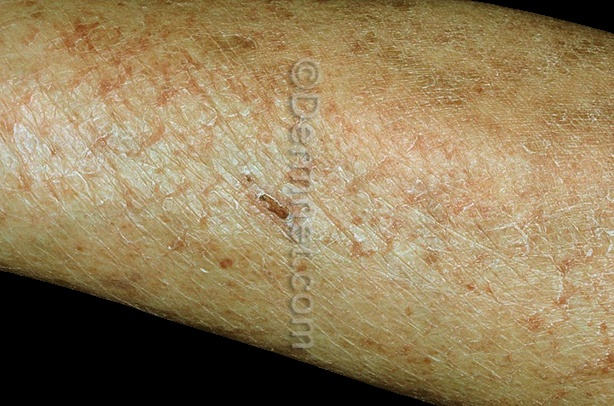

eczema_0184.png_rotated_90_2.jpg


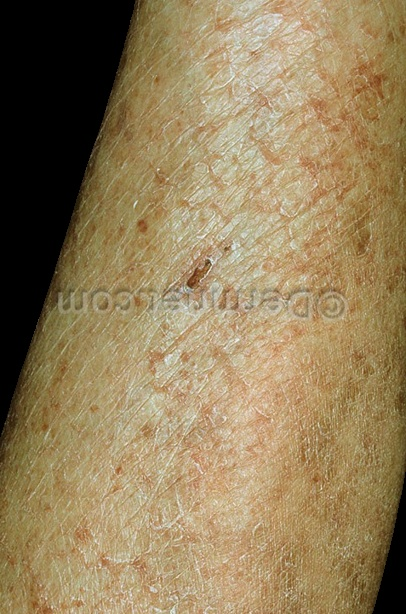

eczema_0184.png_rotated_90_3.jpg


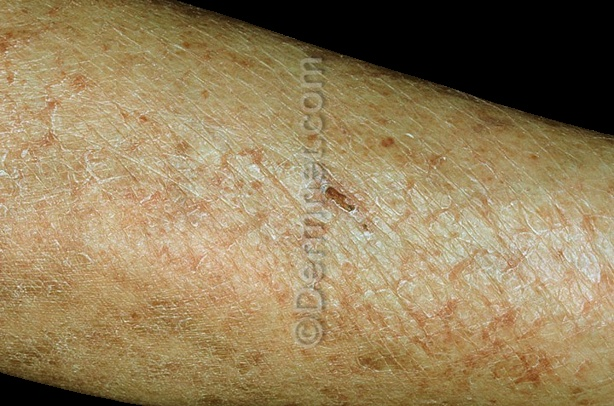

eczema_0184.png_flipped_h.jpg


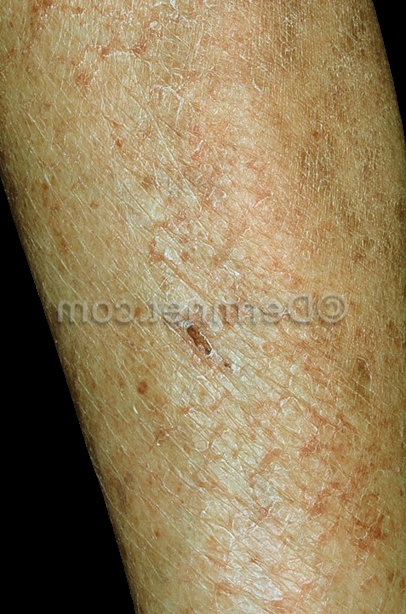

eczema_0184.png_flipped_v.jpg


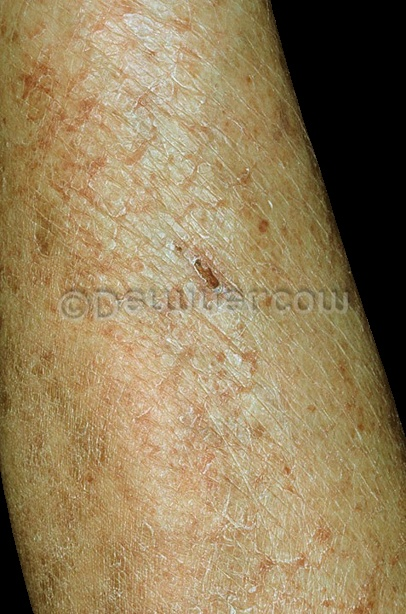

eczema_0185.png_rotated_90_1.jpg


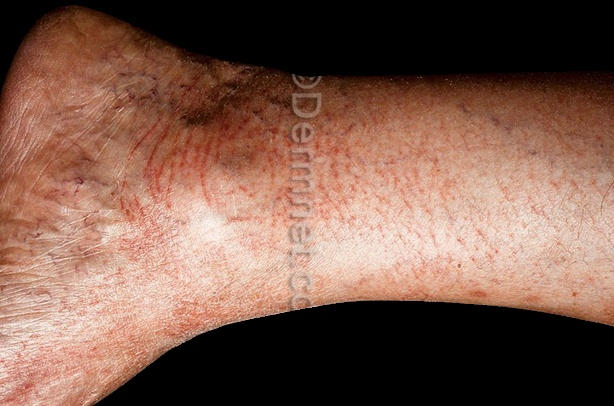

eczema_0185.png_rotated_90_2.jpg


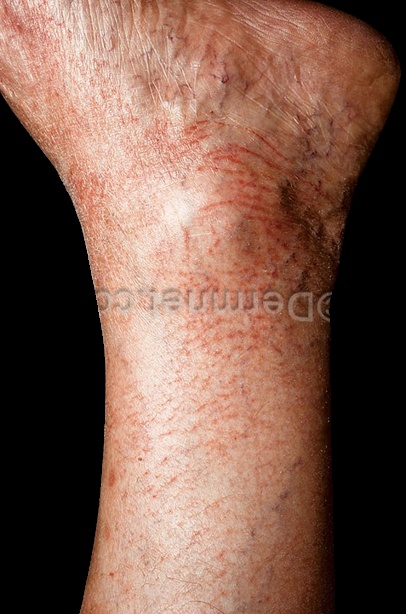

eczema_0185.png_rotated_90_3.jpg


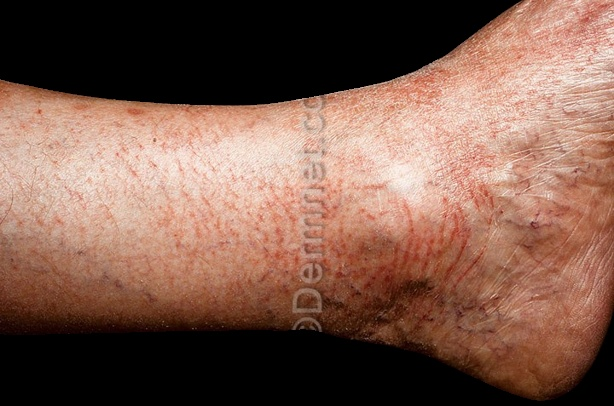

eczema_0185.png_flipped_h.jpg


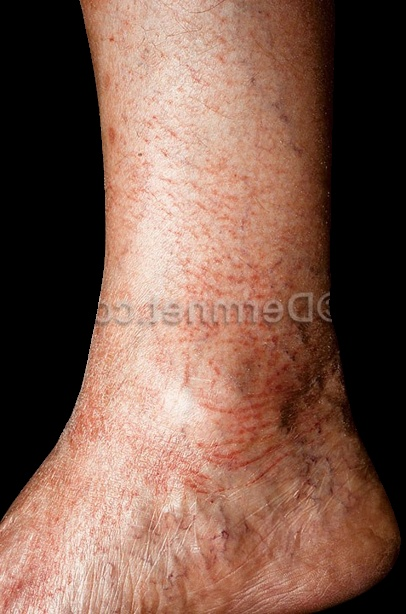

eczema_0185.png_flipped_v.jpg


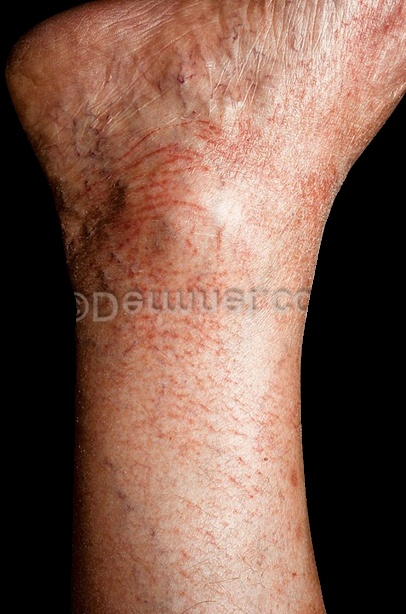

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/eczema'


onlyeczemafiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlyeczemafiles)))
print("Image examples: ")


for i in range(10):
    print(onlyeczemafiles[i])
    display(_Imgdis(filename=folder + "/" + onlyeczemafiles[i], width=240, height=240))

Working with 1835 images
Image examples: 
psoriasis_0168.png_rotated_90_1.jpg


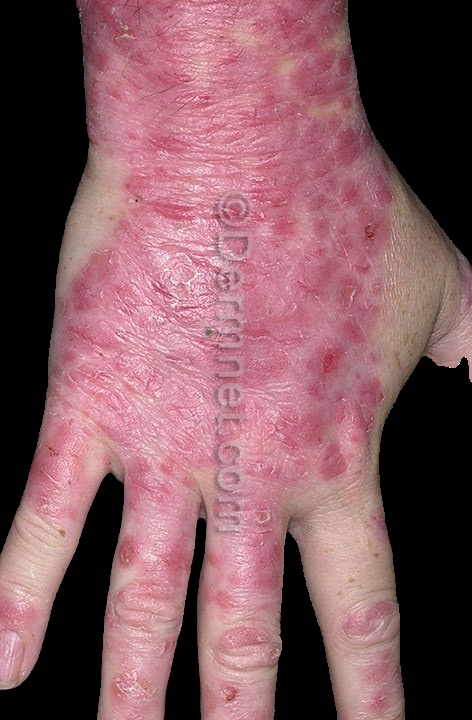

psoriasis_0168.png_rotated_90_2.jpg


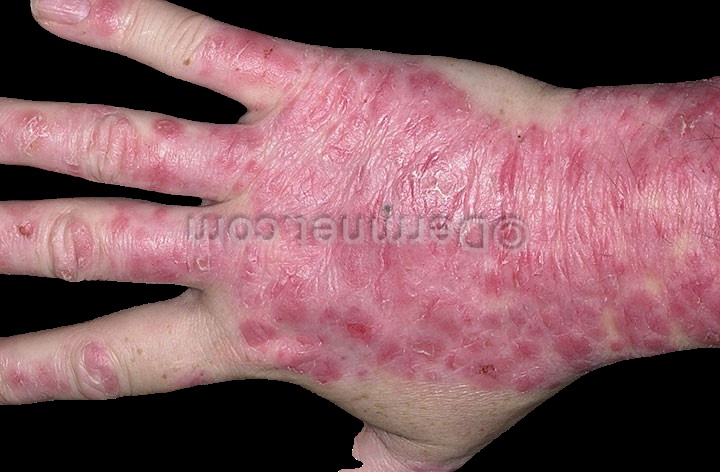

psoriasis_0168.png_rotated_90_3.jpg


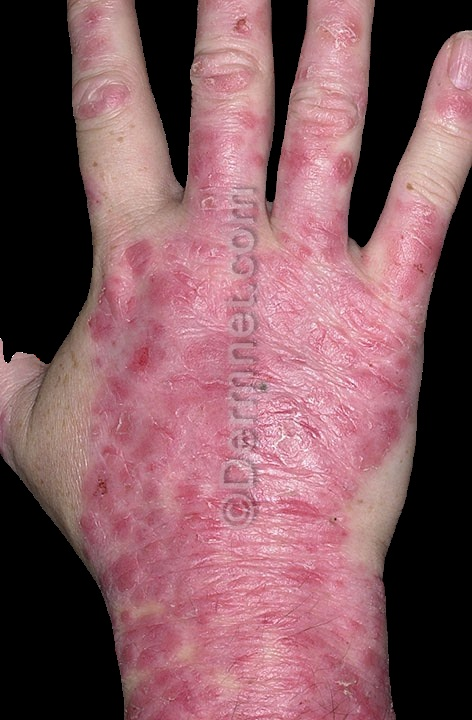

psoriasis_0168.png_flipped_h.jpg


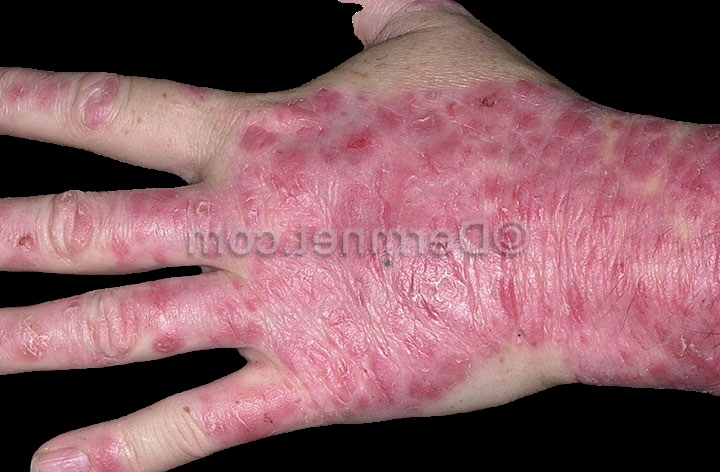

psoriasis_0168.png_flipped_v.jpg


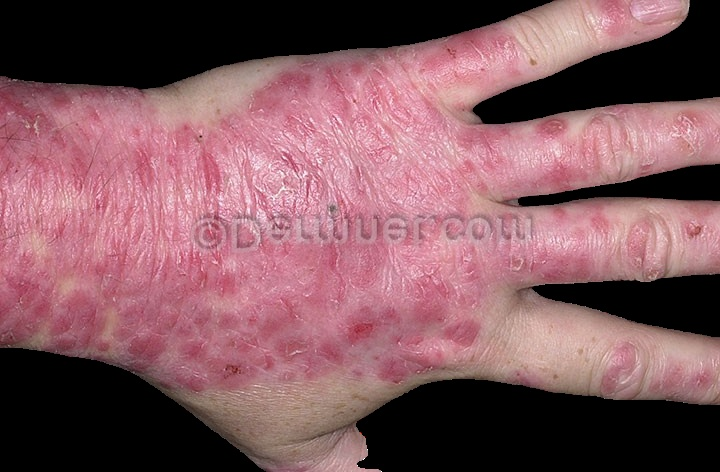

psoriasis_0169.png_rotated_90_1.jpg


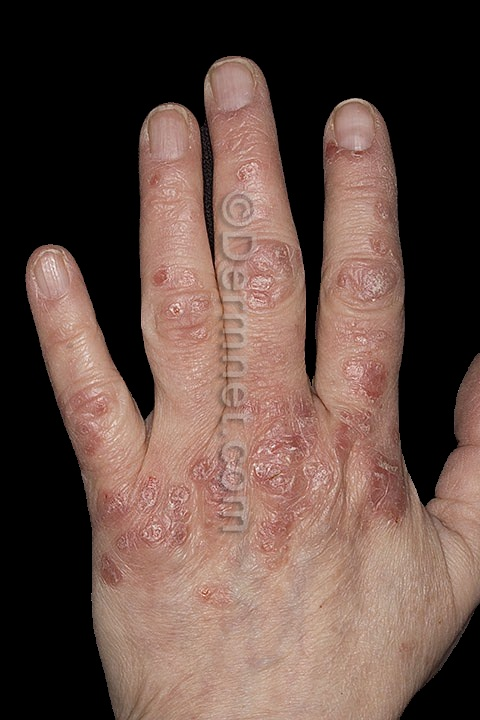

psoriasis_0169.png_rotated_90_2.jpg


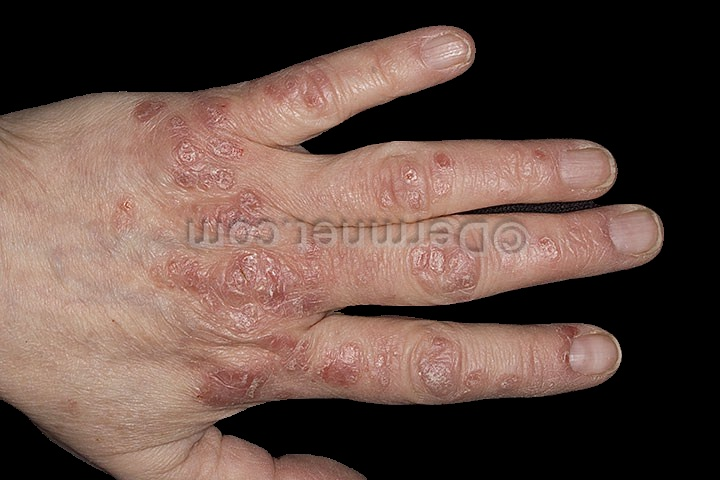

psoriasis_0169.png_rotated_90_3.jpg


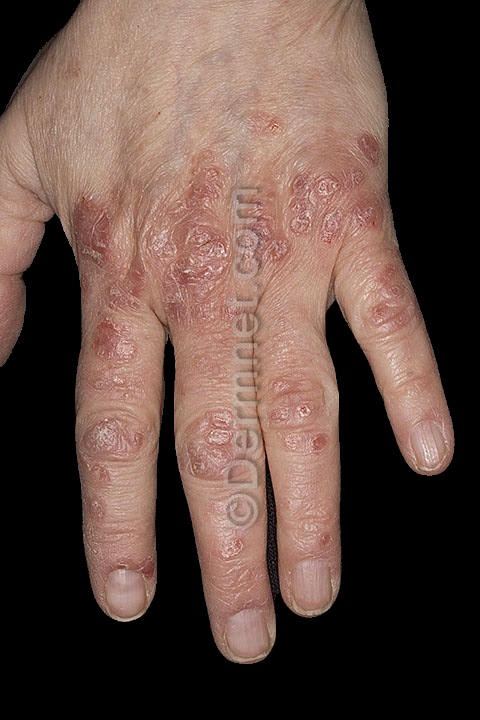

psoriasis_0169.png_flipped_h.jpg


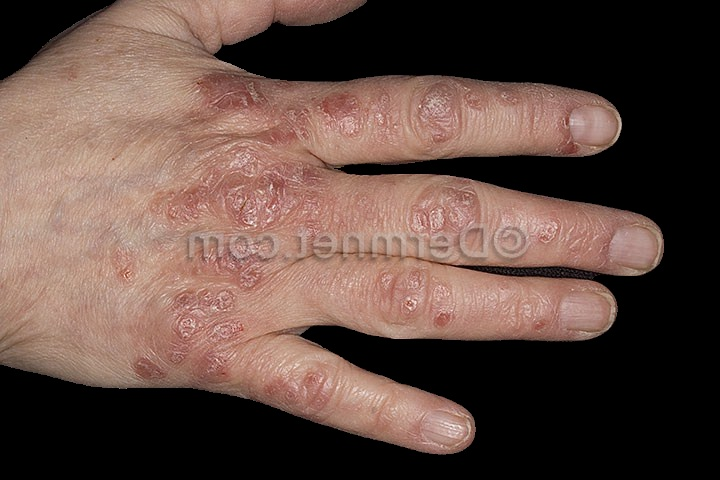

psoriasis_0169.png_flipped_v.jpg


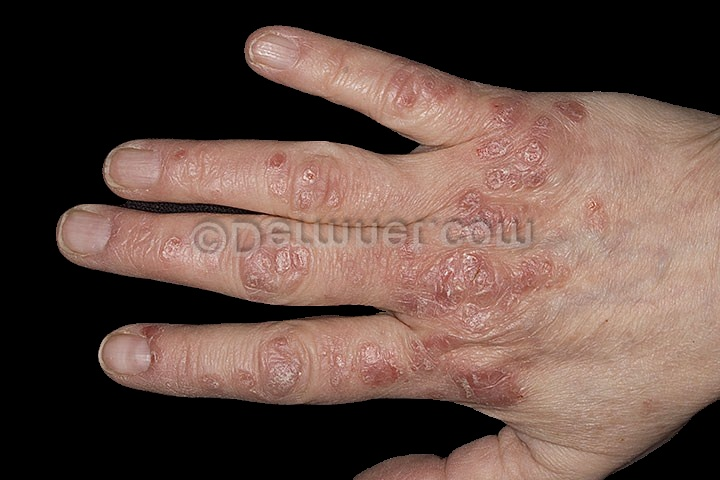

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/psoriasis'


onlypsoriasisfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlypsoriasisfiles)))
print("Image examples: ")


for i in range(10):
    print(onlypsoriasisfiles[i])
    display(_Imgdis(filename=folder + "/" + onlypsoriasisfiles[i], width=240, height=240))

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Projects/SkinDiseaseDetectionSystem/Dataset/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3750 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 322 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodelV1.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=117,
  validation_steps=10,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)


<ipython-input-19-f063db006db6>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(



Epoch 1: val_loss improved from inf to 2.33091, saving model to mymodelV1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


117/117 - 912s - loss: 3.0533 - accuracy: 0.6200 - val_loss: 2.3309 - val_accuracy: 0.7031 - 912s/epoch - 8s/step
Epoch 2/100

Epoch 2: val_loss did not improve from 2.33091
117/117 - 77s - loss: 2.4454 - accuracy: 0.7168 - val_loss: 3.2891 - val_accuracy: 0.6719 - 77s/epoch - 660ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 2.33091
117/117 - 79s - loss: 2.4362 - accuracy: 0.7370 - val_loss: 2.8339 - val_accuracy: 0.7031 - 79s/epoch - 672ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 2.33091
117/117 - 76s - loss: 2.6121 - accuracy: 0.7456 - val_loss: 3.4433 - val_accuracy: 0.6844 - 76s/epoch - 649ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 2.33091
117/117 - 78s - loss: 2.4032 - accuracy: 0.7824 - val_loss: 3.7227 - val_accuracy: 0.6969 - 78s/epoch - 669ms/step
Epoch 6/100

Epoch 6: val_loss did not improve from 2.33091
117/117 - 76s - loss: 2.1822 - accuracy: 0.7883 - val_loss: 3.1507 - val_accuracy: 0.7594 - 76s/epoch - 647ms/step
Epoch 7/100

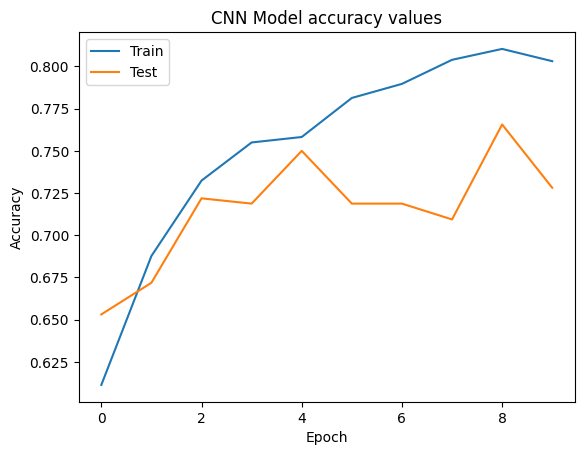

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Projects/SkinDiseaseDetectionSystem/saved_models/sddsm_f.keras')